# Stroke data analysis and prediction using Vertica

### Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Connecting to Vertica 

In [1]:
from verticapy.connect import *
new_auto_connection({"host": "127.0.0.1", 
                     "port": "5433", 
                     "database": "VMart", 
                     "password": "password", 
                     "user": "dbadmin"},
                    name = "VerticaDSN")
change_auto_connection("VerticaDSN")

Drop table in case it Exists

In [2]:
from verticapy.utilities import *
drop(name = "public.stroke")

True

Load data through CSV

In [3]:
from verticapy import read_csv
stroke = read_csv("healthcare-dataset-stroke-data.csv",na_rep='N/A')

## Data Exploration

,"123""id""Int100%","123""age""Numeric(6,3)100%","123""hypertension""Int100%","123""heart_disease""Int100%","010""ever_married""Boolean100%","123""avg_glucose_level""Numeric(8,3)100%","123""stroke""Int100%","Abc""gender""Varchar(20)100%","Abc""work_type""Varchar(26)100%","Abc""Residence_type""Varchar(20)100%","Abc""bmi""Varchar(100)96%","Abc""smoking_status""Varchar(30)100%"
count,5110,5110,5110,5110,5110,5110,5110,5110,5110,5110,4909,5110
unique,5110,104,2,2,2,3979,2,3,5,2,418,4
top,67,78,0,0,1,93.88,0,Female,Private,Urban,[null],never smoked
top_percent,0.02,1.996,90.254,94.599,65.616,0.117,95.127,58.591,57.241,50.802,3.933,37.025
avg,36517.8293542074,43.226614481409,0.0974559686888454,0.0540117416829746,0.656164383561644,106.147677103718,0.0487279843444227,5.1720156555773,8.24618395303327,5.0,3.8015889183133,10.0823874755382
stddev,21161.7216248272,22.6126467231135,0.296606674233791,0.226062987503365,0.475033520037369,45.283560150582,0.215319856980238,0.985091276286859,2.1420626259333,0.0,0.597936482555954,3.31601436027959
min,67,0.08,0,0,0,55.12,0,4,7,5,2,6
25%,17759.8260869565,25,0,0,0,77.2242857142857,0,4,7,5,4,7
50%,36862.8965517241,45,0,0,1,91.8483333333333,0,6,7,5,4,12
75%,54707.95,61,0,0,1,114.082,0,6,8,5,4,12

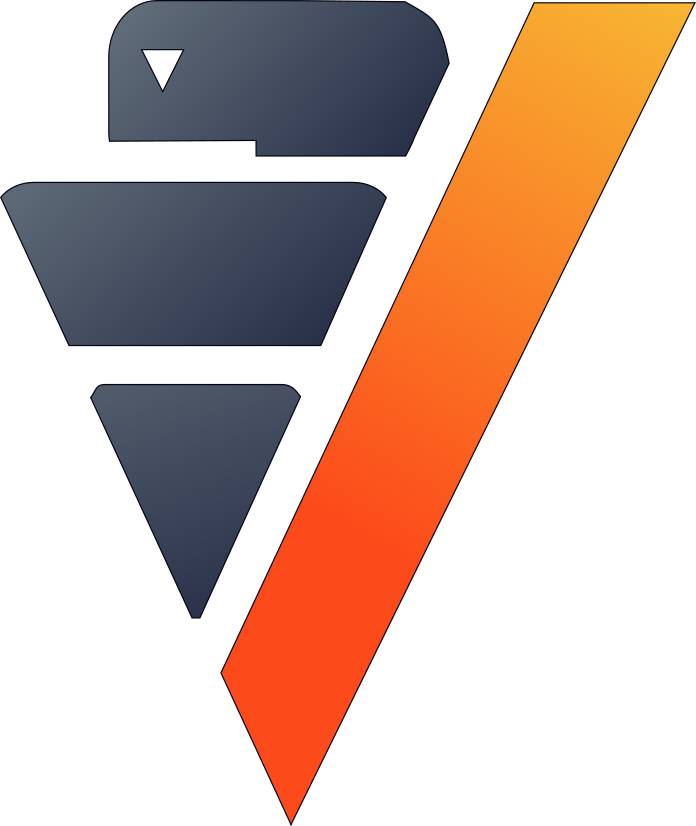

In [5]:
stroke.describe(method='all')

,123idInt100%,AbcgenderVarchar(20)100%,"123ageNumeric(6,3)100%",123hypertensionInt100%,123heart_diseaseInt100%,010ever_marriedBoolean100%,Abcwork_typeVarchar(26)100%,AbcResidence_typeVarchar(20)100%,"123avg_glucose_levelNumeric(8,3)100%",AbcbmiVarchar(100)96%,Abcsmoking_statusVarchar(30)100%,123strokeInt100%
1,67,Female,17.0,0,0,❌,Private,Urban,92.97,[null],formerly smoked,0
2,77,Female,13.0,0,0,❌,children,Rural,85.81,18.6,Unknown,0
3,84,Male,55.0,0,0,✅,Private,Urban,89.17,31.5,never smoked,0
4,91,Female,42.0,0,0,❌,Private,Urban,98.53,18.5,never smoked,0
5,99,Female,31.0,0,0,❌,Private,Urban,108.89,52.3,Unknown,0

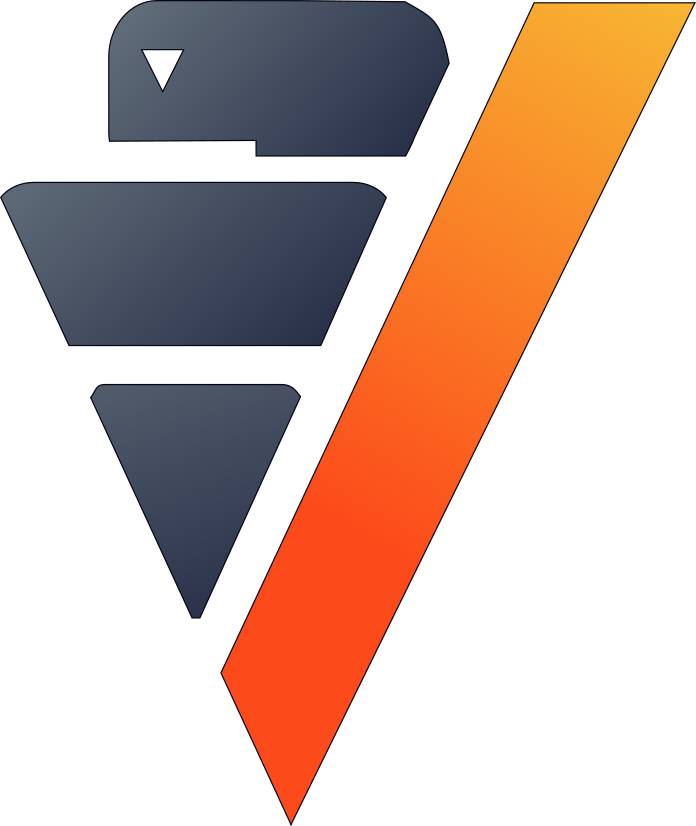

In [6]:
stroke.head()

Find Correlation between label and other features

,"""stroke"""
"""stroke""",1.0
"""age""",0.25
"""heart_disease""",0.135
"""hypertension""",0.128
"""ever_married""",0.108
"""avg_glucose_level""",0.083
"""id""",0.006

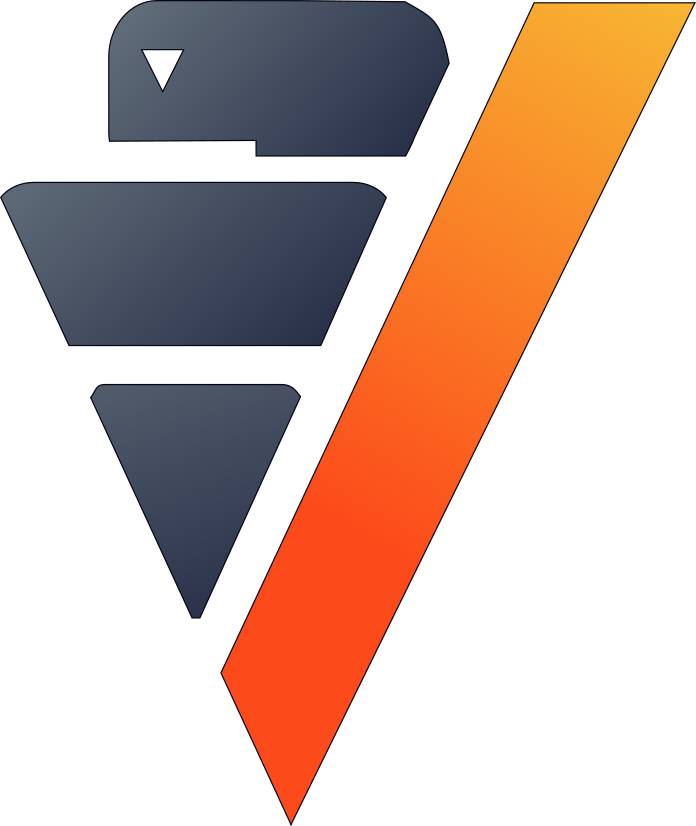

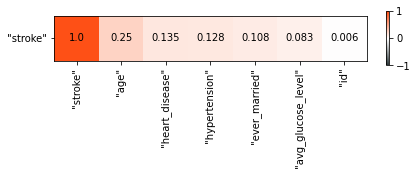

In [7]:
stroke.corr(method = "spearman",focus = 'stroke')

,"""id""","""age""","""hypertension""","""heart_disease""","""ever_married""","""avg_glucose_level""","""stroke"""
"""id""",1.0,0.00374356524847954,0.003552998082141,-0.00120548637573988,0.0136541573300447,-0.0530318095044541,0.00649915330124558
"""age""",0.00374356524847954,1.0,0.280840595416079,0.270042619176052,0.663387750298413,0.145307944131516,0.24984866229957
"""hypertension""",0.003552998082141,0.280840595416079,1.0,0.10830607646089,0.164243092906894,0.114044155459398,0.12790382346648
"""heart_disease""",-0.00120548637573988,0.270042619176052,0.10830607646089,1.0,0.114644062098013,0.106361135399633,0.134913996968693
"""ever_married""",0.0136541573300447,0.663387750298413,0.164243092906894,0.114644062098013,1.0,0.0983894157228049,0.10833974165701
"""avg_glucose_level""",-0.0530318095044541,0.145307944131516,0.114044155459398,0.106361135399633,0.0983894157228049,1.0,0.0825460703955187
"""stroke""",0.00649915330124558,0.24984866229957,0.12790382346648,0.134913996968693,0.10833974165701,0.0825460703955187,1.0

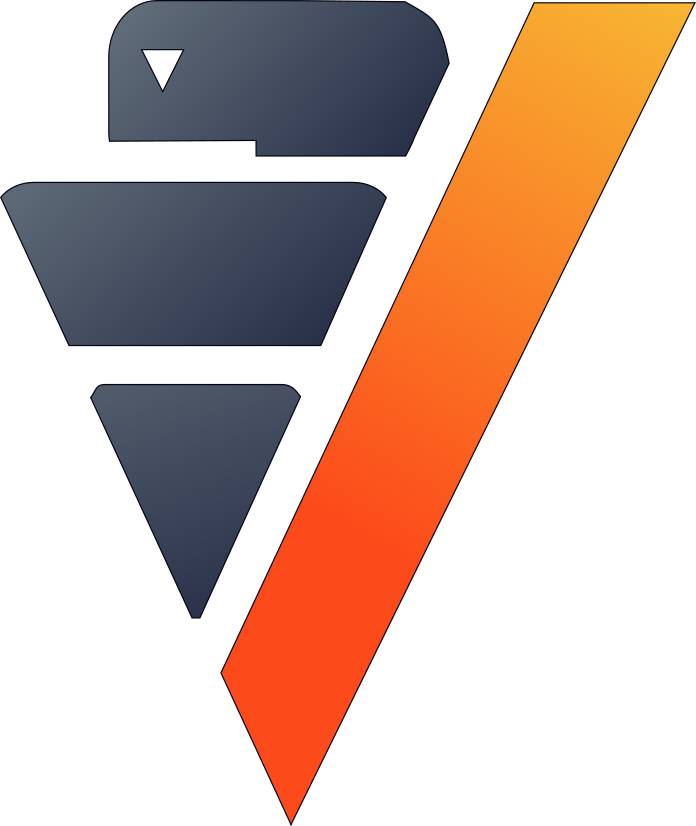

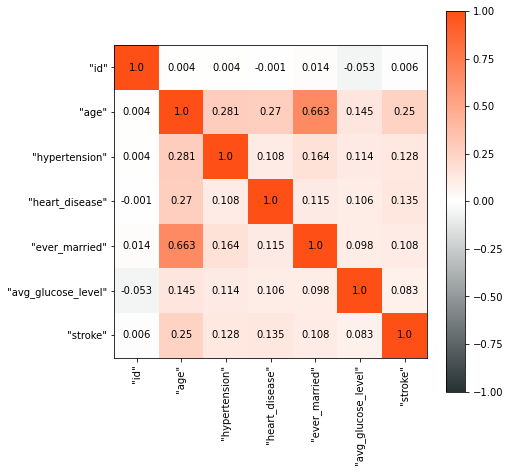

In [8]:
stroke.corr(method='spearman')

## Data Preparation

Dropping null values

201 elements were filtered.


,123idInt100%,AbcgenderVarchar(20)100%,"123ageNumeric(6,3)100%",123hypertensionInt100%,123heart_diseaseInt100%,010ever_marriedBoolean100%,Abcwork_typeVarchar(26)100%,AbcResidence_typeVarchar(20)100%,"123avg_glucose_levelNumeric(8,3)100%",AbcbmiVarchar(100)96%,Abcsmoking_statusVarchar(30)100%,123strokeInt100%
1,77,Female,13.0,0,0,❌,children,Rural,85.81,18.6,Unknown,0
2,84,Male,55.0,0,0,✅,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,42.0,0,0,❌,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,31.0,0,0,❌,Private,Urban,108.89,52.3,Unknown,0
5,129,Female,24.0,0,0,❌,Private,Urban,97.55,26.2,never smoked,0
6,156,Female,33.0,0,0,✅,Private,Rural,86.97,42.2,never smoked,0
7,163,Female,20.0,0,0,❌,Private,Rural,94.67,28.8,Unknown,0
8,187,Female,20.0,0,0,❌,Private,Rural,84.07,27.6,smokes,0
9,205,Female,43.0,0,0,✅,Private,Rural,88.23,37.6,Unknown,0
10,210,Male,81.0,0,0,✅,Self-employed,Rural,91.54,31.4,never smoked,1

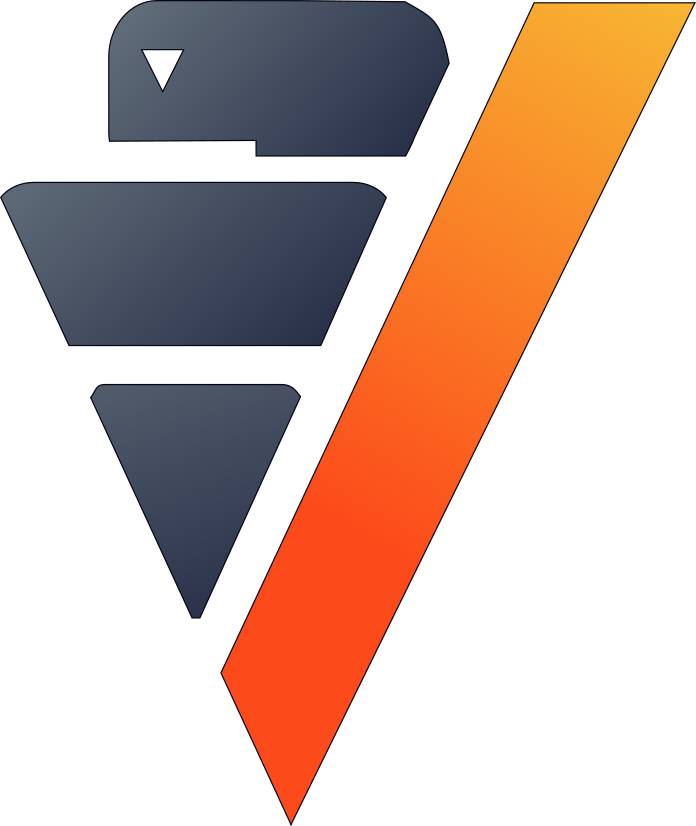

In [9]:
#stroke.drop('bmi')
stroke['bmi'].dropna()

Save the vDataFrame to DB for future use

,123idInt100%,AbcgenderVarchar(20)100%,"123ageNumeric(6,3)100%",123hypertensionInt100%,123heart_diseaseInt100%,010ever_marriedBoolean100%,Abcwork_typeVarchar(26)100%,AbcResidence_typeVarchar(20)100%,"123avg_glucose_levelNumeric(8,3)100%",AbcbmiVarchar(100)96%,Abcsmoking_statusVarchar(30)100%,123strokeInt100%
1,77,Female,13.0,0,0,❌,children,Rural,85.81,18.6,Unknown,0
2,84,Male,55.0,0,0,✅,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,42.0,0,0,❌,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,31.0,0,0,❌,Private,Urban,108.89,52.3,Unknown,0
5,129,Female,24.0,0,0,❌,Private,Urban,97.55,26.2,never smoked,0
6,156,Female,33.0,0,0,✅,Private,Rural,86.97,42.2,never smoked,0
7,163,Female,20.0,0,0,❌,Private,Rural,94.67,28.8,Unknown,0
8,187,Female,20.0,0,0,❌,Private,Rural,84.07,27.6,smokes,0
9,205,Female,43.0,0,0,✅,Private,Rural,88.23,37.6,Unknown,0
10,210,Male,81.0,0,0,✅,Self-employed,Rural,91.54,31.4,never smoked,1

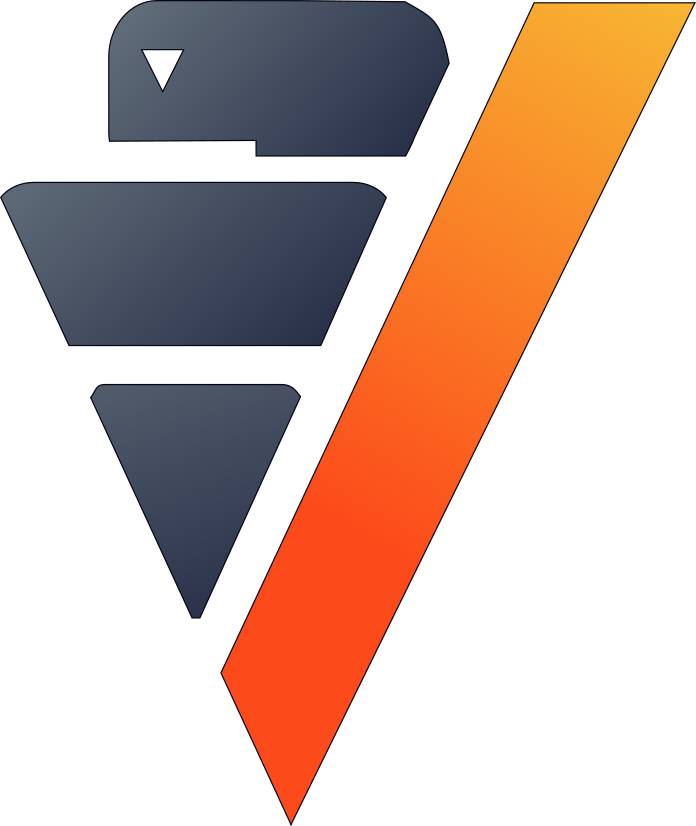

In [10]:
stroke.to_db(name = '"public"."stroke"',relation_type = "table")

Balancing the data

,123idInt100%,AbcgenderVarchar(20)100%,"123ageNumeric(6,3)100%",123hypertensionInt100%,123heart_diseaseInt100%,010ever_marriedBoolean100%,Abcwork_typeVarchar(26)100%,AbcResidence_typeVarchar(20)100%,"123avg_glucose_levelNumeric(8,3)100%",AbcbmiVarchar(100)96%,Abcsmoking_statusVarchar(30)100%,123strokeInt100%
1,91,Female,42.0,0,0,❌,Private,Urban,98.53,18.5,never smoked,0
2,129,Female,24.0,0,0,❌,Private,Urban,97.55,26.2,never smoked,0
3,156,Female,33.0,0,0,✅,Private,Rural,86.97,42.2,never smoked,0
4,163,Female,20.0,0,0,❌,Private,Rural,94.67,28.8,Unknown,0
5,187,Female,20.0,0,0,❌,Private,Rural,84.07,27.6,smokes,0
6,205,Female,43.0,0,0,✅,Private,Rural,88.23,37.6,Unknown,0
7,210,Male,81.0,0,0,✅,Self-employed,Rural,91.54,31.4,never smoked,1
8,210,Male,81.0,0,0,✅,Self-employed,Rural,91.54,31.4,never smoked,1
9,210,Male,81.0,0,0,✅,Self-employed,Rural,91.54,31.4,never smoked,1
10,210,Male,81.0,0,0,✅,Self-employed,Rural,91.54,31.4,never smoked,1

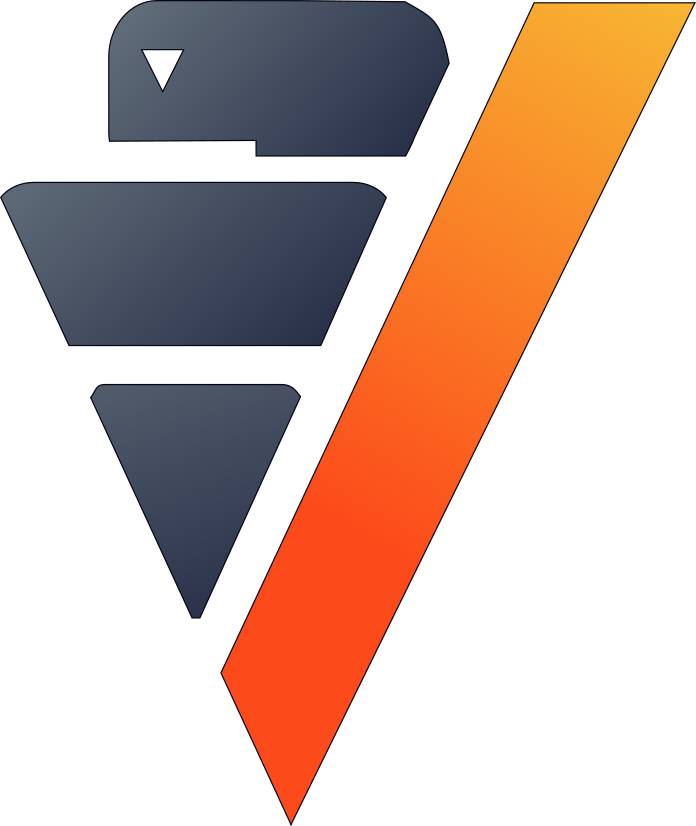

In [11]:
from verticapy.learn.preprocessing import Balance
drop("public.strokebalanced")
Balance(name = "public.strokebalanced", input_relation = "public.stroke",y = "stroke")

Read the balanced data, Check value count of the label

,value
name,"""stroke"""
dtype,int
unique,2.0
count,4919.0
1,2462
0,2409

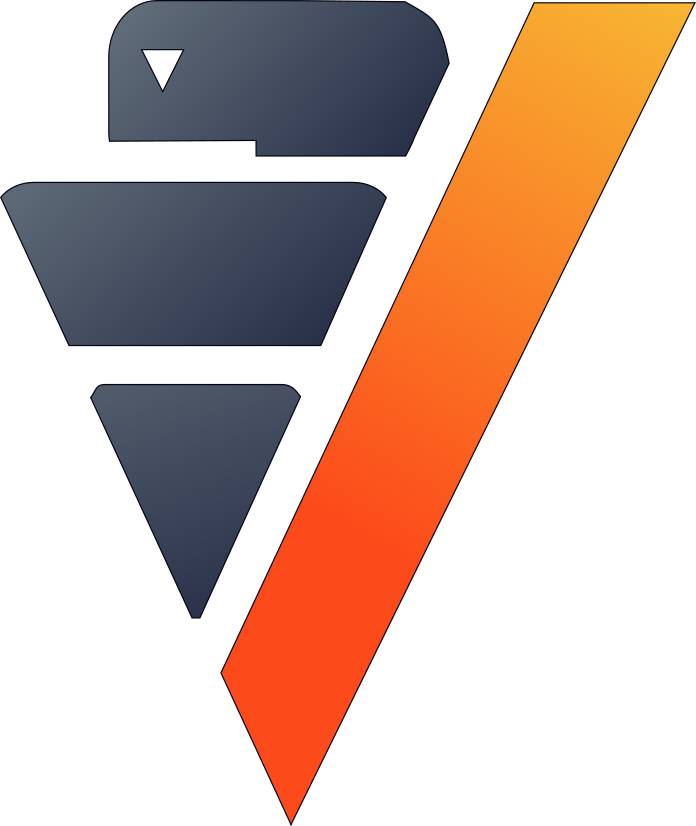

In [12]:
from verticapy import vDataFrame
stroke = vDataFrame(input_relation = '"public"."strokebalanced"')
stroke['stroke'].value_counts()

Prepare the data for model training and evaluation

,123genderInt100%,"123ageNumeric(6,3)100%",123hypertensionInt100%,123heart_diseaseInt100%,010ever_marriedBoolean100%,123work_typeInt100%,123Residence_typeInt100%,"123avg_glucose_levelNumeric(8,3)100%",123bmiInt96%,123smoking_statusInt100%,123strokeInt100%
1,0,13.0,0,0,❌,4,0,85.81,49,0,0
2,1,55.0,0,0,✅,2,1,89.17,177,2,0
3,0,42.0,0,0,❌,2,1,98.53,48,2,0
4,0,31.0,0,0,❌,2,1,108.89,350,0,0
5,0,33.0,0,0,✅,2,0,86.97,283,2,0
6,0,20.0,0,0,❌,2,0,94.67,150,0,0
7,0,20.0,0,0,❌,2,0,84.07,138,3,0
8,0,43.0,0,0,✅,2,0,88.23,238,0,0
9,1,81.0,0,0,✅,3,0,91.54,176,2,1
10,1,81.0,0,0,✅,3,0,91.54,176,2,1

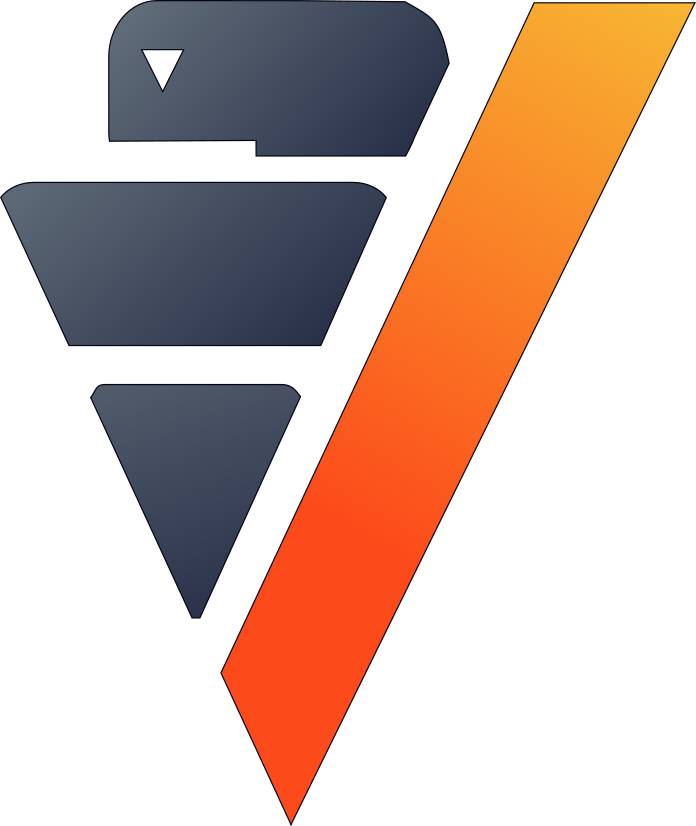

In [13]:
stroke['gender'].label_encode()
stroke['bmi'].label_encode()
stroke['work_type'].label_encode()
stroke['Residence_type'].label_encode()
stroke['smoking_status'].label_encode()
stroke.drop('id')

,"""stroke"""
"""stroke""",1.0
"""age""",0.582
"""ever_married""",0.298
"""hypertension""",0.249
"""heart_disease""",0.23
"""avg_glucose_level""",0.214
"""smoking_status""",0.131
"""bmi""",0.118
"""work_type""",-0.107
"""gender""",0.019

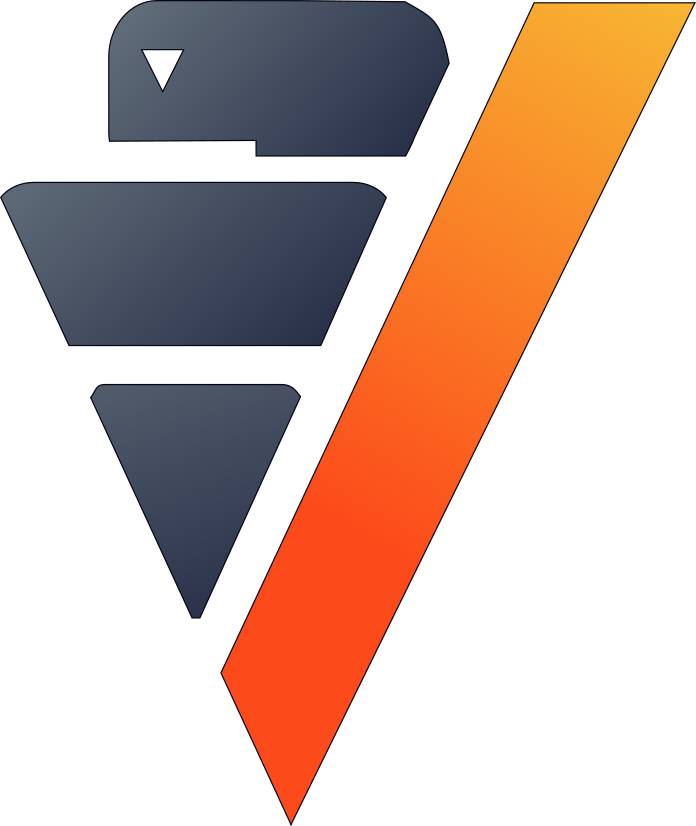

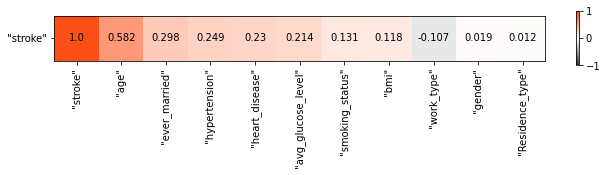

In [14]:
stroke.corr(method = "spearman",focus = 'stroke')

,"""gender""","""age""","""hypertension""","""heart_disease""","""ever_married""","""work_type""","""Residence_type""","""avg_glucose_level""","""bmi""","""smoking_status""","""stroke"""
"""gender""",1.0,0.00399800206242687,-0.0231308305078453,0.136207724192928,0.00911284179928003,0.014070355858848,-0.00512003501498645,0.126193237722049,0.0471786624370294,-0.0329072321335275,0.015793188903412
"""age""",0.00399800206242687,1.0,0.276899792733714,0.288845235071406,0.456631359408699,-0.110191348864193,0.00850533618653299,0.202099641759653,0.0944593145623665,0.132793034791145,0.572905992448668
"""hypertension""",-0.0231308305078453,0.276899792733714,1.0,0.086031730636137,0.0960358843649412,0.022330394850105,-0.00797384354044578,0.11706773624392,0.114304476235402,0.12051146706953,0.265152371180179
"""heart_disease""",0.136207724192928,0.288845235071406,0.086031730636137,1.0,0.11298785025195,-0.0886388647931156,-0.000299327271105465,0.20004098315031,0.0884797276943123,0.123470665209669,0.235109007661645
"""ever_married""",0.00911284179928003,0.456631359408699,0.0960358843649412,0.11298785025195,1.0,-0.25773105211148,-0.0397090028298951,0.157180717446007,0.268245931249472,0.194517715997805,0.299733750623688
"""work_type""",0.014070355858848,-0.110191348864193,0.022330394850105,-0.0886388647931156,-0.25773105211148,1.0,0.000210489439526805,-0.0748363854815779,-0.218368781719585,-0.199530744790243,-0.0962450685620165
"""Residence_type""",-0.00512003501498645,0.00850533618653299,-0.00797384354044578,-0.000299327271105465,-0.0397090028298951,0.000210489439526805,1.0,0.0191590170109093,0.0261687485559686,0.0145195911504335,0.00877958811054085
"""avg_glucose_level""",0.126193237722049,0.202099641759653,0.11706773624392,0.20004098315031,0.157180717446007,-0.0748363854815779,0.0191590170109093,1.0,0.220141578788522,0.0843352710186406,0.211852335164913
"""bmi""",0.0471786624370294,0.0944593145623665,0.114304476235402,0.0884797276943123,0.268245931249472,-0.218368781719585,0.0261687485559686,0.220141578788522,1.0,0.148634336851239,0.133131752354638
"""smoking_status""",-0.0329072321335275,0.132793034791145,0.12051146706953,0.123470665209669,0.194517715997805,-0.199530744790243,0.0145195911504335,0.0843352710186406,0.148634336851239,1.0,0.147187856703267

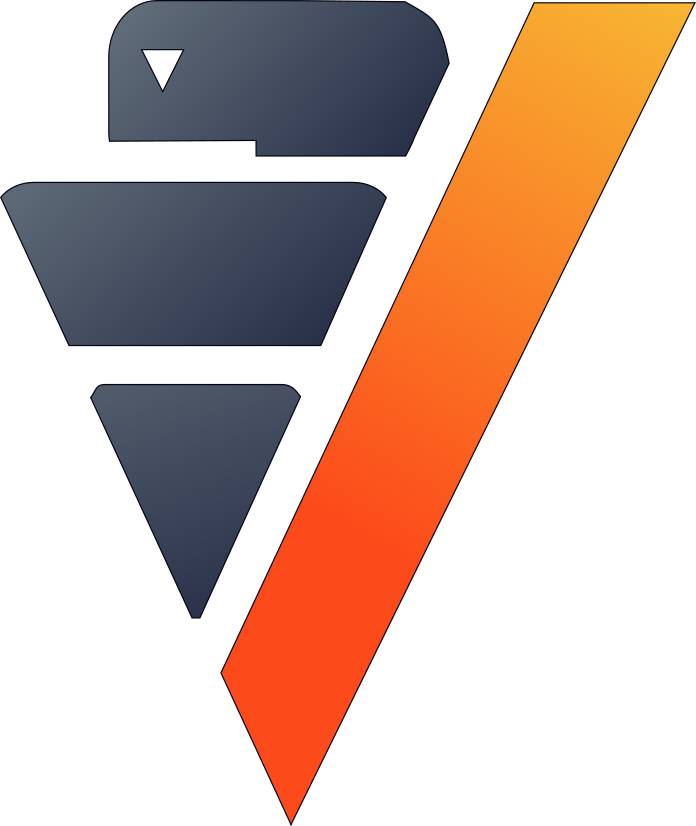

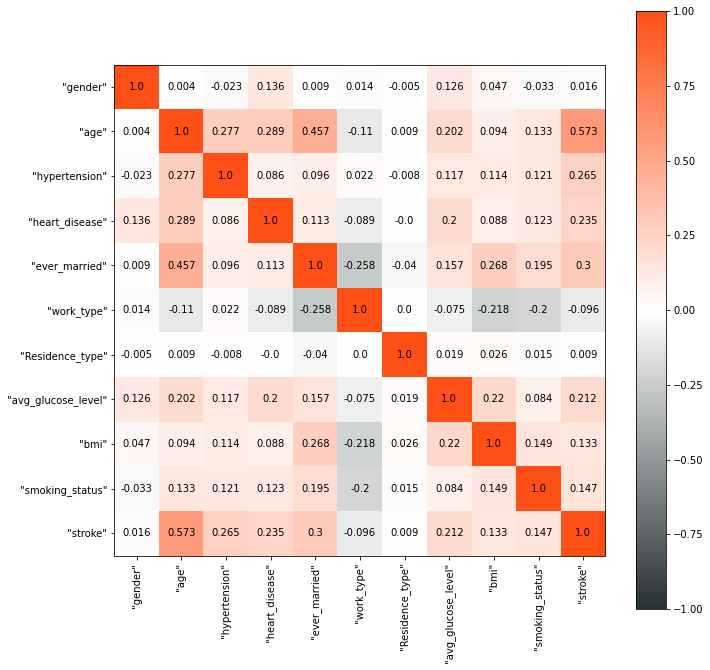

In [16]:
stroke.corr(method='spearman')

## Model Training

Split Data to Train and Test

In [17]:
train, test = stroke.train_test_split()

Initialize Model

In [33]:
from verticapy.learn.ensemble import RandomForestClassifier
model = RandomForestClassifier("rf_stroke", max_depth=10)

Drop Previous Model, Train new model

In [34]:
model.drop()
model.fit(train,stroke.get_columns(exclude_columns = ["stroke"]),"stroke",test)



call_string
SELECT rf_classifier('public.rf_stroke', '"public"._VERTICAPY_TEMPORARY_VIEW_dbadmin_18238', 'stroke', '"gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status"' USING PARAMETERS exclude_columns='', ntree=10, mtry=4, sampling_size=0.632, max_depth=10, max_breadth=1000000000, min_leaf_size=1, min_info_gain=0, nbins=32);

details
    predictor    |      type      
-----------------+----------------
     gender      |      int       
       age       |float or numeric
  hypertension   |      int       
  heart_disease  |      int       
  ever_married   |      bool      
    work_type    |      int       
 residence_type  |      int       
avg_glucose_level|float or numeric
       bmi       |      int       
 smoking_status  |      int       


Additional Info
       Name       |Value
------------------+-----
    tree_count    | 10  
rejected_row_count|  0  
accepted_row_count|3304 

## Model Evaluation

Calculating the importance of features

,importance,sign
age,38.64,1
avg_glucose_level,18.33,1
bmi,15.76,1
smoking_status,5.98,1
work_type,5.86,1
ever_married,3.85,1
hypertension,3.6,1
residence_type,3.14,1
gender,3.0,1
heart_disease,1.84,1

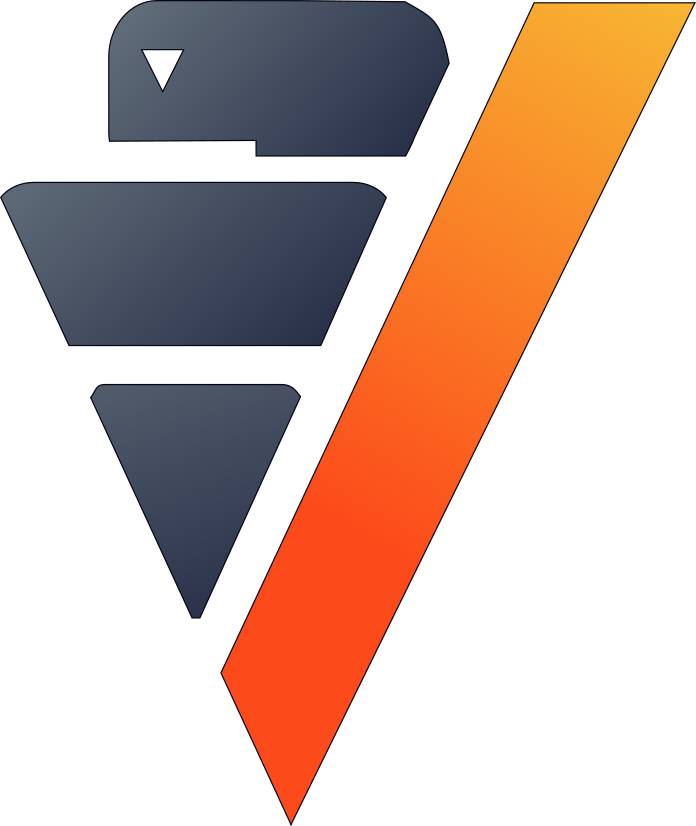

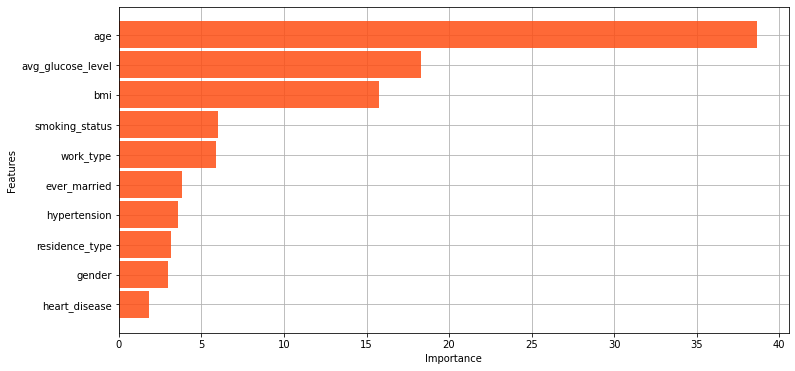

In [20]:
model.features_importance()

Evaluation criteria

,value
auc,0.9864153796437987
prc_auc,0.9844632605909555
accuracy,0.951702786377709
log_loss,0.0956532727098529
precision,0.9270588235294117
recall,0.9800995024875622
f1_score,0.9528415961305925
mcc,0.9048963737546438
informedness,0.9036506738809038
markedness,0.906143790849673

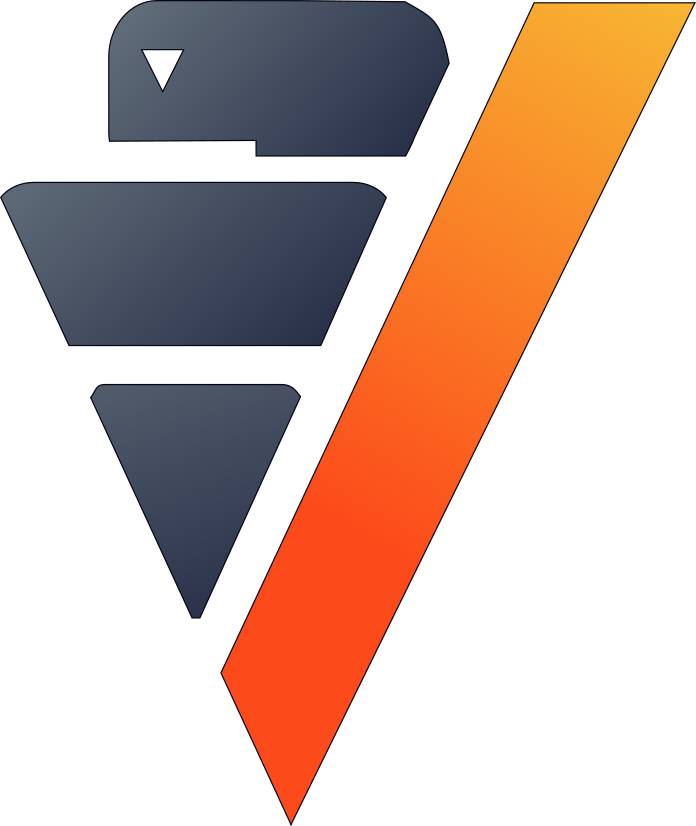

In [35]:
model.classification_report()

Predicting results separately on test set

,123genderInteger,"123ageNumeric(6,3)",123hypertensionInteger,123heart_diseaseInteger,010ever_marriedBoolean,123work_typeInteger,123Residence_typeInteger,"123avg_glucose_levelNumeric(8,3)",123bmiInteger,123smoking_statusInteger,123strokeInteger,AbcpredictionVarchar(1)
1,1,81.0,0,0,✅,3,0,91.54,176,2,1,1
2,1,81.0,0,0,✅,3,0,91.54,176,2,1,1
3,1,81.0,0,0,✅,3,0,91.54,176,2,1,1
4,1,81.0,0,0,✅,3,0,91.54,176,2,1,1
5,1,81.0,0,0,✅,3,0,91.54,176,2,1,1
6,1,4.0,0,0,❌,4,1,98.56,38,0,0,0
7,1,31.0,0,0,❌,2,1,72.6,178,2,0,0
8,0,65.0,0,0,✅,2,1,72.49,151,3,0,0
9,0,44.0,1,0,✅,2,0,69.48,275,2,0,0
10,0,37.0,0,0,✅,0,1,72.09,103,3,0,0

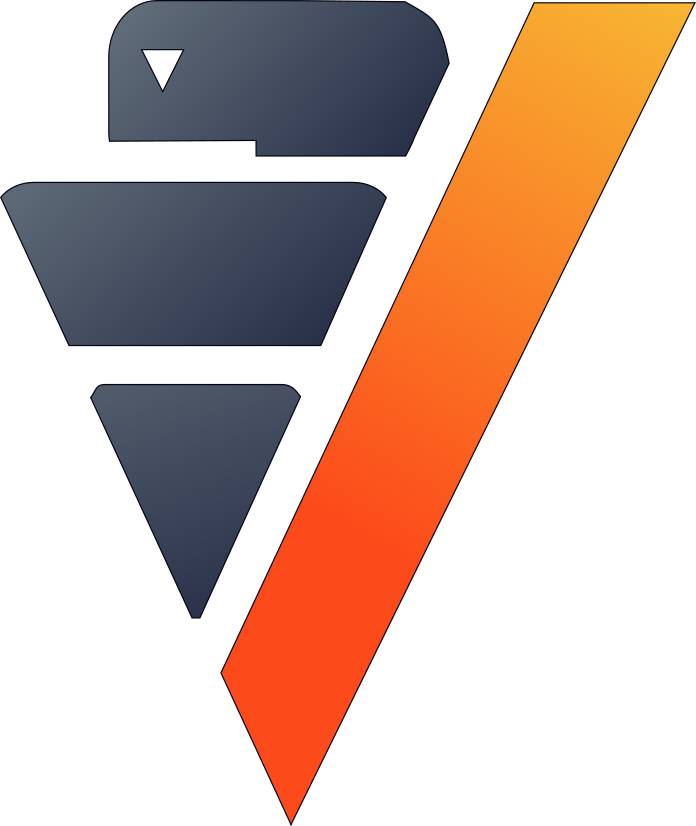

In [36]:
#test.drop('prediction')
model.predict(test, 
              X = stroke.get_columns(exclude_columns = ["stroke"]),
              name = "prediction",
              cutoff = 0.5)

Calculating Results

In [37]:
from verticapy.learn.metrics import accuracy_score
accuracy_score("stroke", "prediction", test)

0.932716049382716

,0,1
0,752,95
1,12,758

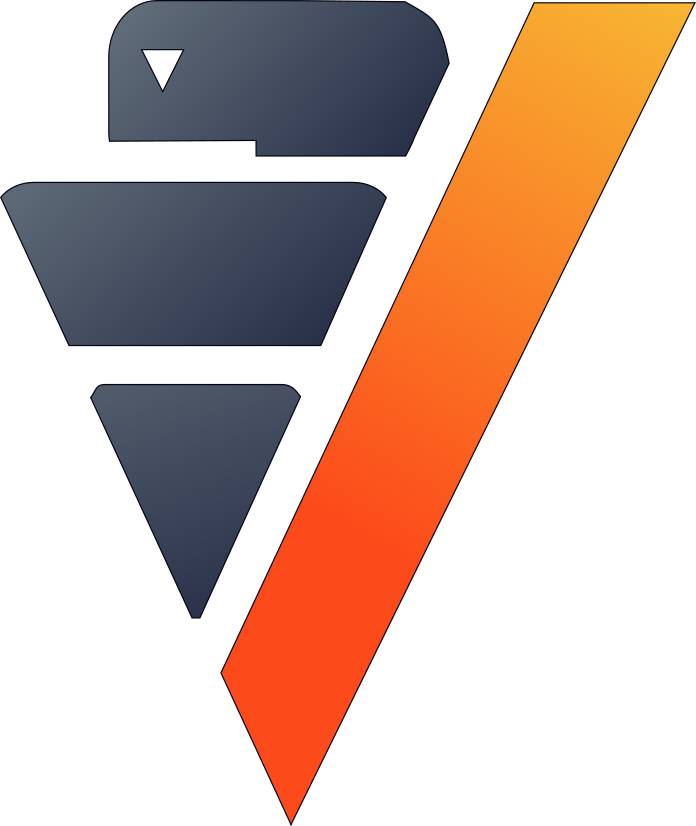

In [38]:
from verticapy.learn.metrics import confusion_matrix
confusion_matrix("stroke", "prediction", test)

## Deployment/ Management

In [4]:
from verticapy.learn.tools import *
model = load_model("rf_stroke")

In [5]:
display(model.deploySQL())

'PREDICT_RF_CLASSIFIER("gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status" USING PARAMETERS model_name = \'rf_stroke\', match_by_pos = \'true\')'